# Anwendungsübung zur Rekursion

In diesem Notebook soll eine graphische Anwendung einer rekursiven Funktion
implementiert werden.

In [43]:
from pytamaro import (
    rectangle, Graphic, Empty,
    black,
    pin, bottom_left, bottom_right, top_left, top_right, bottom_center,
    rotate, compose, graphic_height, overlay,
    show_graphic,
)

from pytamaro.de import kombiniere

In [25]:
def draw_line(length: float) -> Graphic:
    width = length * 0.1
    return rectangle(length, width, black)

show_graphic(draw_line(50))

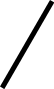

In [13]:
testline = draw_line(100)
show_graphic(rotate(60, testline))

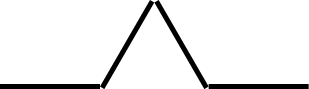

In [14]:
def compose_element(element: Graphic) -> Graphic:
    first_quarter = pin(bottom_right, element)
    second_quarter = pin(bottom_left, rotate(60, element))
    half = kombiniere(first_quarter, second_quarter)
    third_quarter = pin(bottom_left, rotate(-60, element))
    half = pin(bottom_right, half)
    three_quarter = kombiniere(half, third_quarter)
    fourth_quarter = pin(bottom_left, element)
    three_quarter = pin(bottom_right, three_quarter)
    return kombiniere(three_quarter, fourth_quarter)

show_graphic(compose_element(testline))

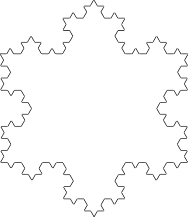

In [47]:
def hilbert(n: int, m = 1) -> Graphic:
    BASE_LENGTH = 100
    if n == 1:
        part = draw_line(BASE_LENGTH / (m**2.5))
        element = compose_element(part)
        return element
    else:
        m += 1        
        return compose_element(hilbert(n-1, m))
    
top_side = hilbert(3)
right_side = rotate(240, top_side)
left_side = rotate(120, top_side)
top_side = pin(bottom_left, top_side)
left_side = pin(top_left, left_side)
stern = kombiniere(top_side, left_side)
stern = pin(bottom_center, stern)
right_side = pin(bottom_left, right_side)
stern = kombiniere(stern, right_side)
show_graphic(stern)
x = graphic_height(stern)
show_graphic(draw_line(x))
        

In [45]:
def create_snow_flake(n: int) -> Graphic:
    top_side = hilbert(3)
    right_side = rotate(240, top_side)
    left_side = rotate(120, top_side)
    top_side = pin(bottom_left, top_side)
    left_side = pin(top_left, left_side)
    stern = kombiniere(top_side, left_side)
    stern = pin(bottom_center, stern)
    right_side = pin(bottom_left, right_side)
    stern = kombiniere(stern, right_side)
    
    spine_length = graphic_height(stern)
    spine = draw_line(spine_length)
    spines = Empty
    for i in range(60, 180, 60):
        spine = overlay(spines, rotate(i, spine))
        
    stern = overlay(spines, stern)
    return stern

show_graphic(create_snow_flake(4))

TypeError: Ungültiger Typ für den Parameter vordere_grafik: erwartet Grafik, erhalten ABCMeta